In [1748]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,LassoCV,RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score,roc_curve, auc, RocCurveDisplay,recall_score,roc_auc_score
from sklearn.datasets import make_classification,make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree,DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest,RandomForestRegressor
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import euclidean,cityblock,cosine
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris,load_digits
from mlxtend.frequent_patterns import apriori,association_rules
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors
import streamlit as st
import joblib
import warnings
warnings.filterwarnings('ignore')

In [1750]:
df=pd.read_csv('StudentPerformanceFactors.csv')

In [1752]:
df.shape

(6607, 20)

In [1753]:
df.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [1754]:
sns.set(style='whitegrid')

In [1757]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [1759]:
df=df.dropna()

In [1760]:
df.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
Exam_Score                    0
dtype: int64

In [1761]:
df.duplicated().sum()

0

In [1762]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [1763]:
df.describe(include='object')

,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Motivation_Level,Internet_Access,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
count,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378,6378
unique,3,3,2,3,2,3,3,2,3,2,3,3,2
top,Medium,Medium,Yes,Medium,Yes,Low,Medium,Public,Positive,No,High School,Near,Male
freq,3251,3204,3807,3237,5893,2582,3826,4434,2553,5710,3159,3801,3688


In [1764]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [1767]:
categorical_cols=['Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities',
        'Motivation_Level', 'Internet_Access',
     'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
                 ]

In [1770]:
for col in categorical_cols:
    print(f"Value Count for column {col} :\n {df[col].value_counts()}")

Value Count for column Parental_Involvement :
 Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64
Value Count for column Access_to_Resources :
 Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64
Value Count for column Extracurricular_Activities :
 Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64
Value Count for column Motivation_Level :
 Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64
Value Count for column Internet_Access :
 Internet_Access
Yes    5893
No      485
Name: count, dtype: int64
Value Count for column Family_Income :
 Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64
Value Count for column Teacher_Quality :
 Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64
Value Count for column School_Type :
 School_Type
Public     4434
Private    1944
Name: count, dtype:

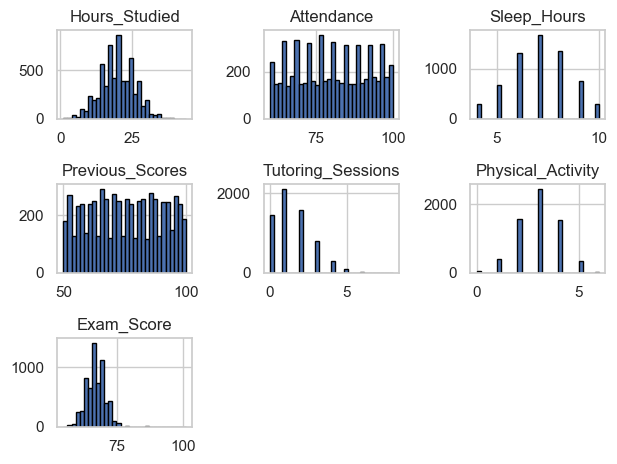

In [1772]:
df.hist(bins=30,edgecolor='black')
plt.tight_layout()
plt.show()

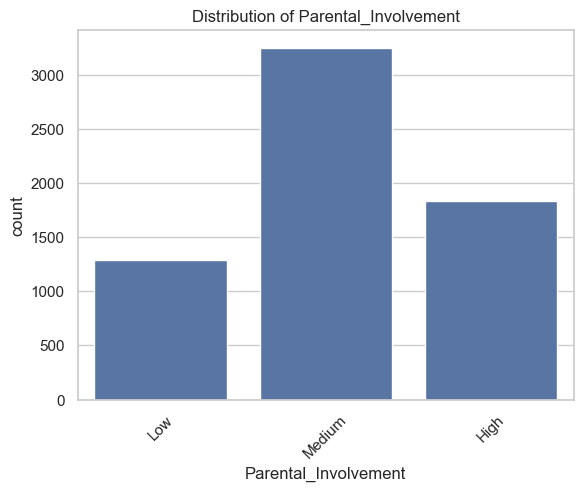

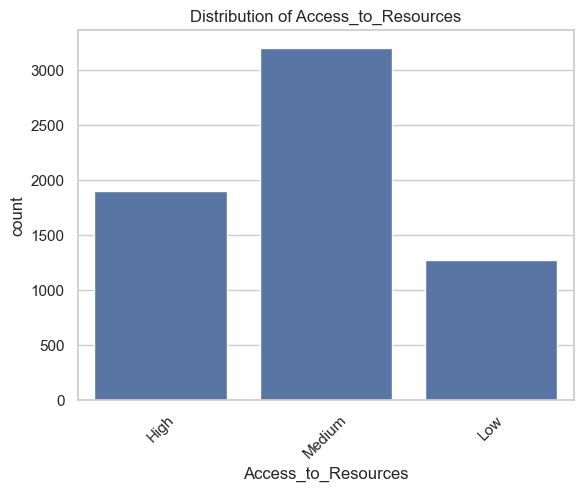

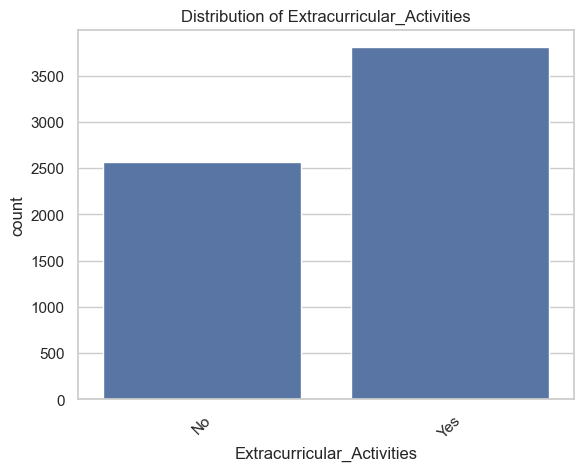

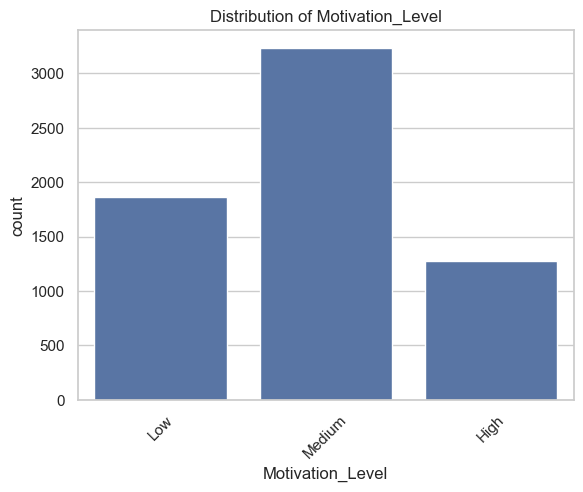

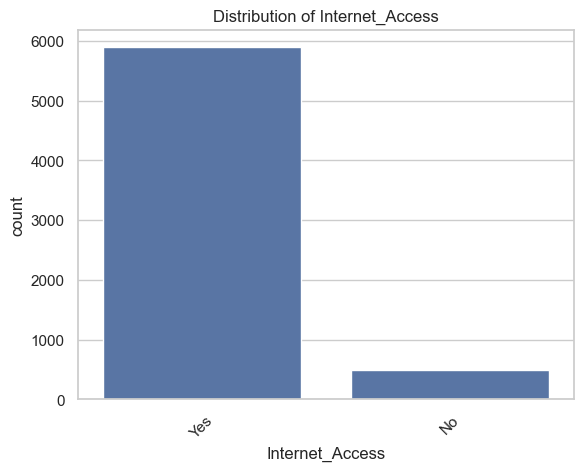

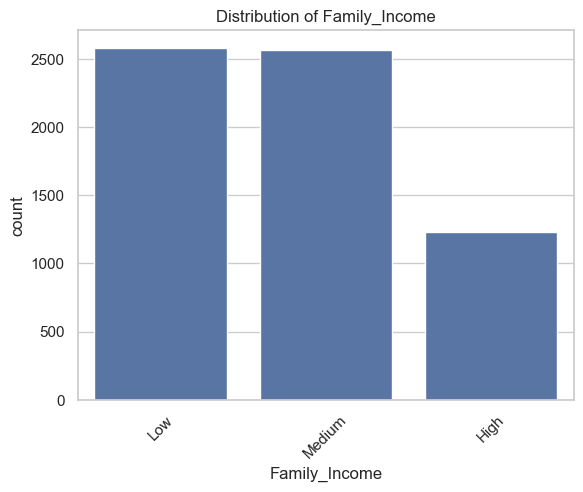

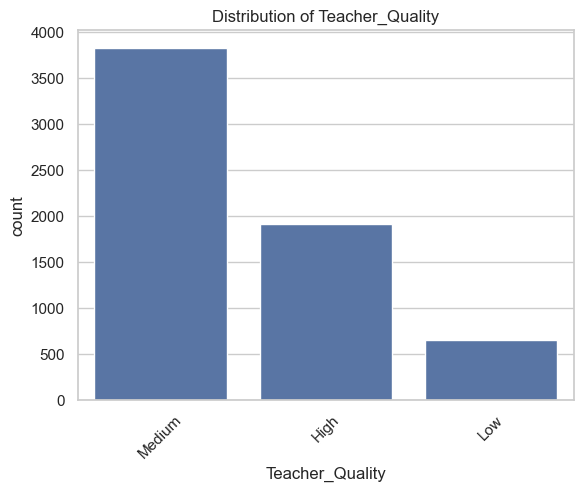

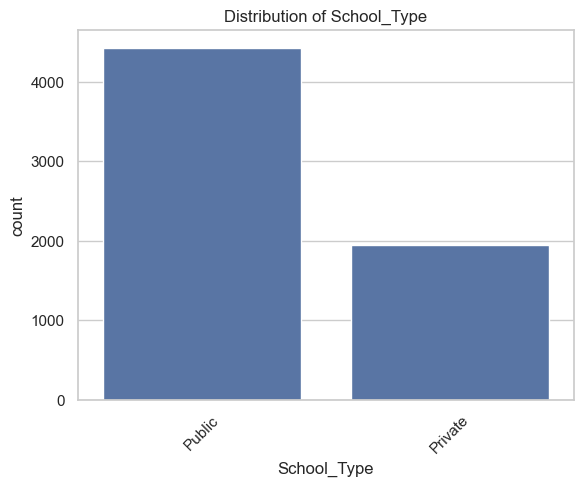

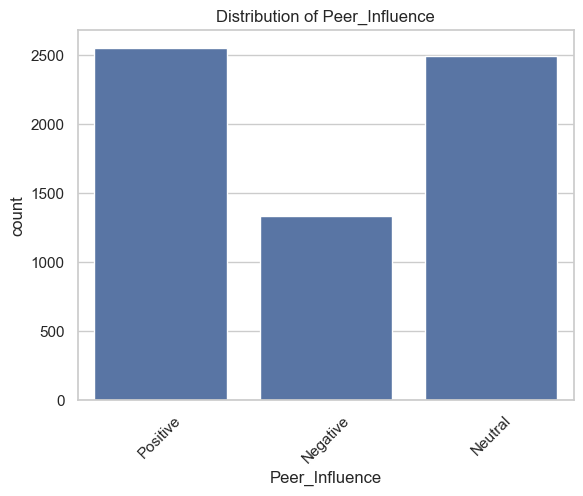

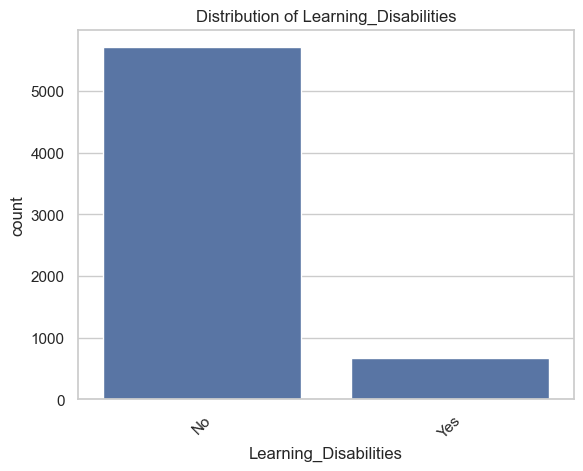

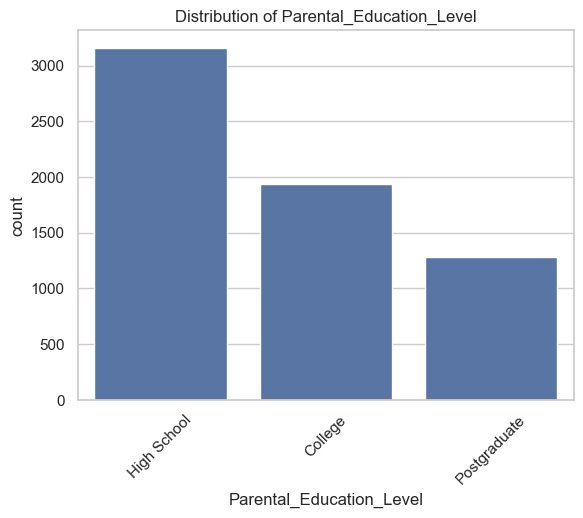

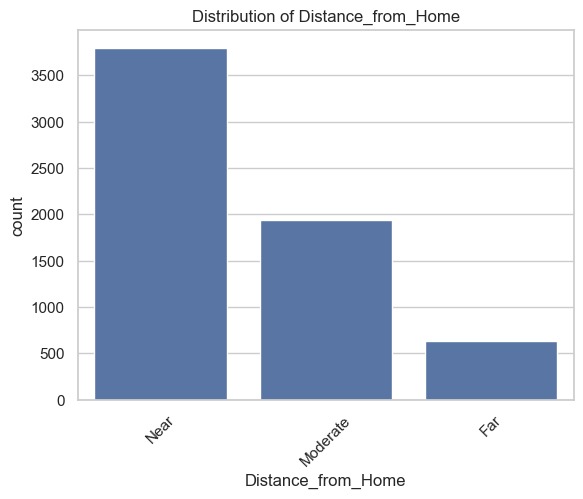

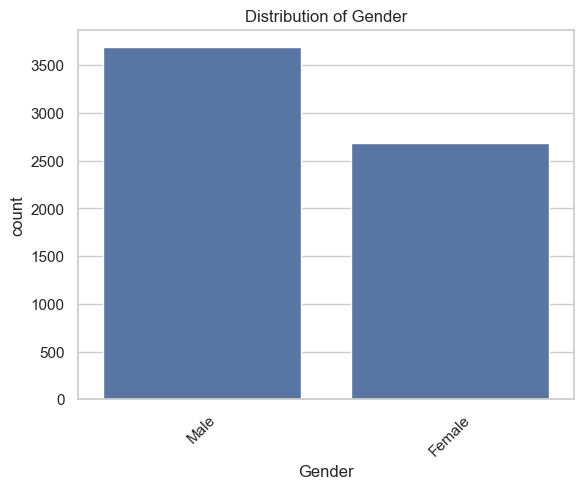

In [1774]:
for col in categorical_cols:
    sns.countplot(data=df,x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

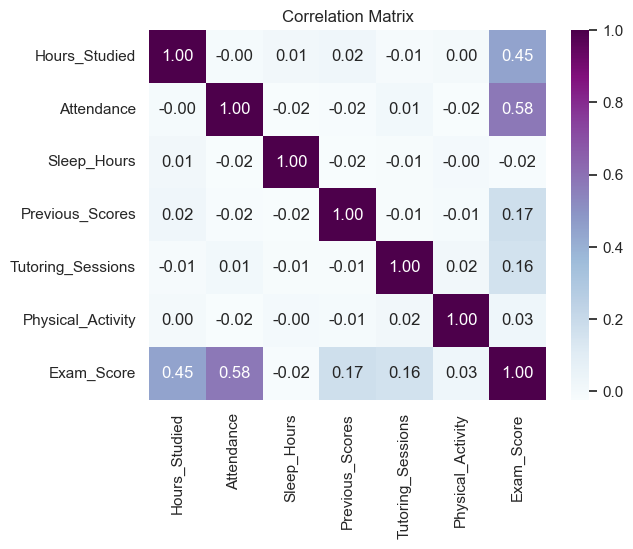

In [1775]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='BuPu',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [1776]:
num_features=['Hours_Studied', 'Attendance',
       'Sleep_Hours',
       'Previous_Scores',
       'Tutoring_Sessions',
     'Physical_Activity']

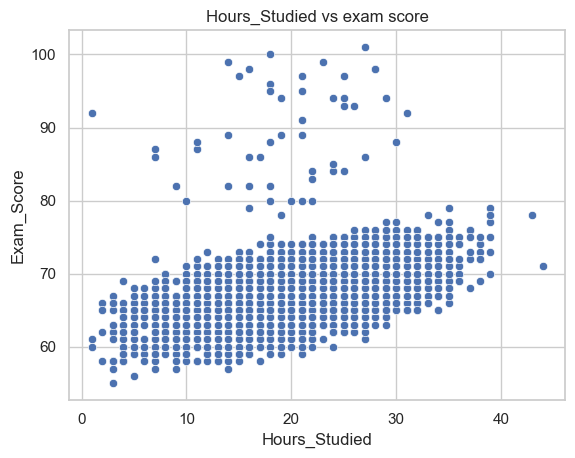

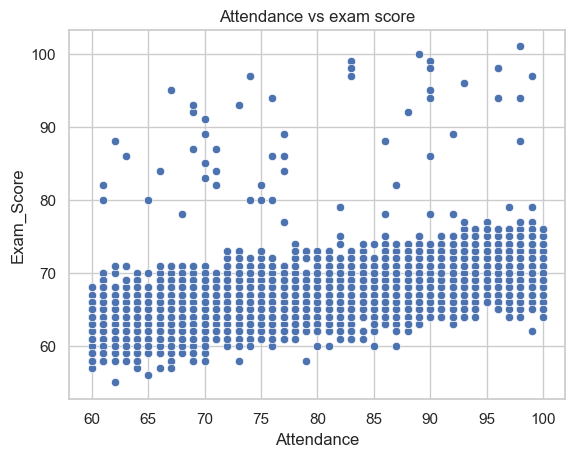

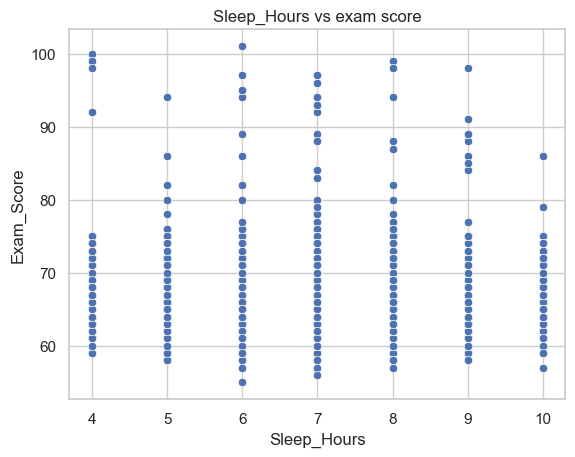

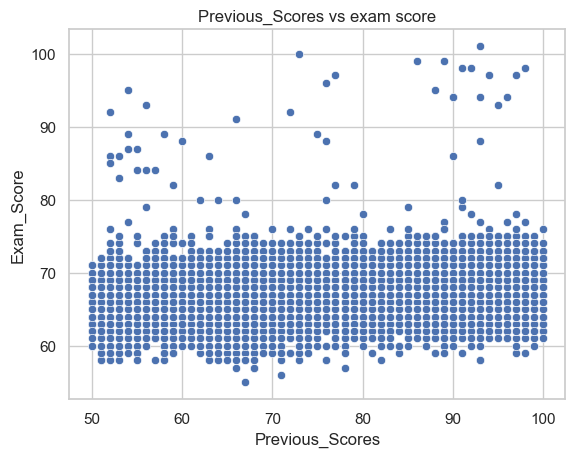

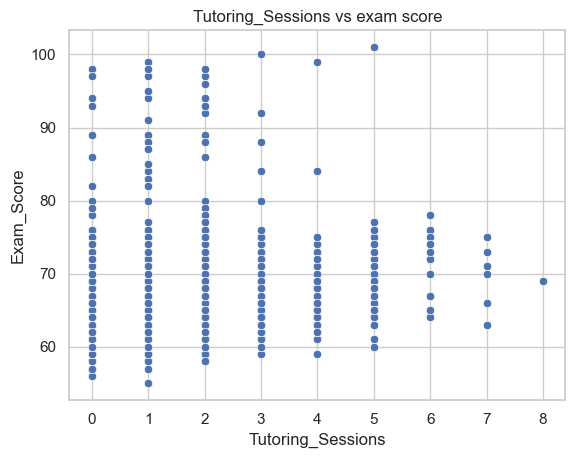

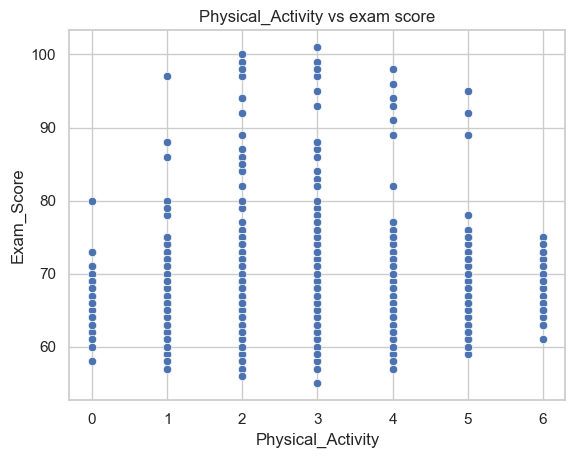

In [1777]:
for feature in num_features:
    sns.scatterplot(data=df,x=feature,y='Exam_Score')
    plt.title(f'{feature} vs exam score')
    plt.show()

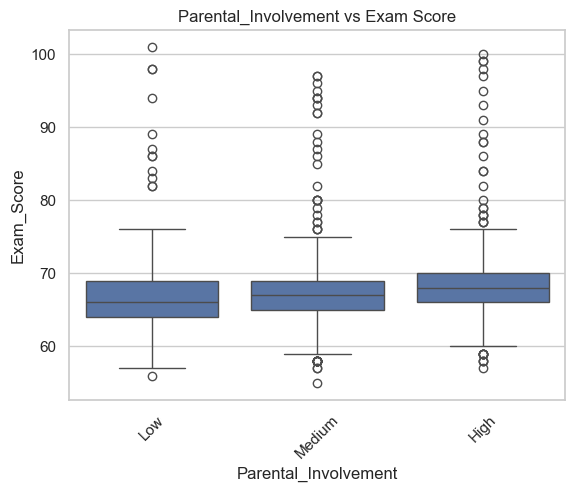

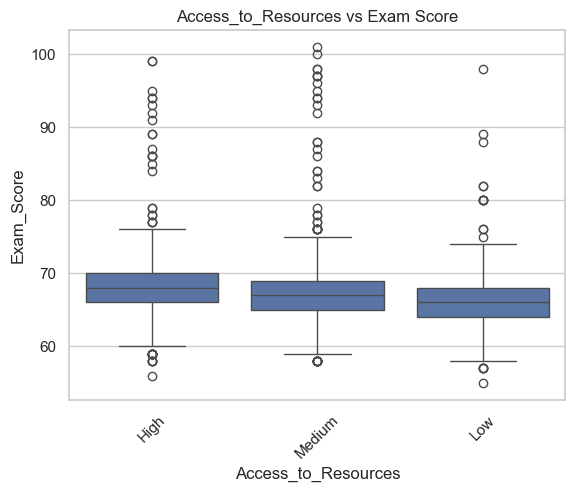

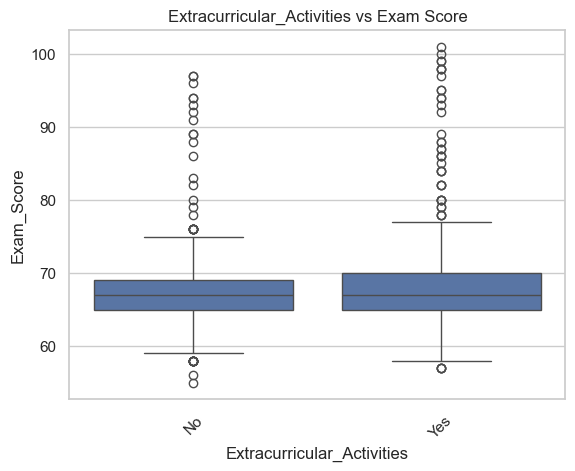

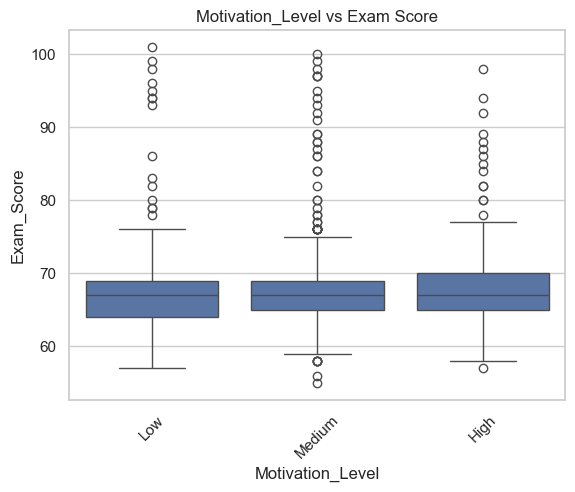

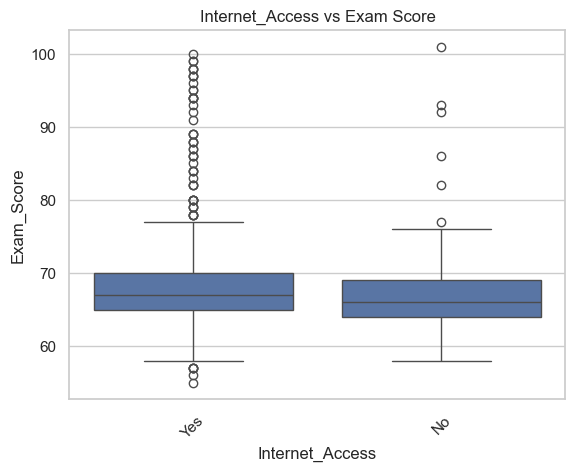

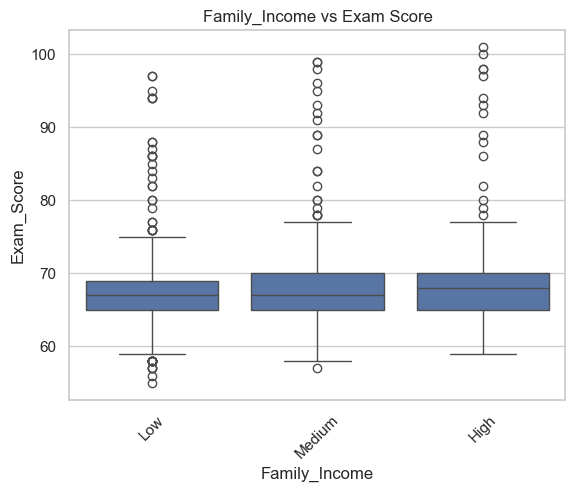

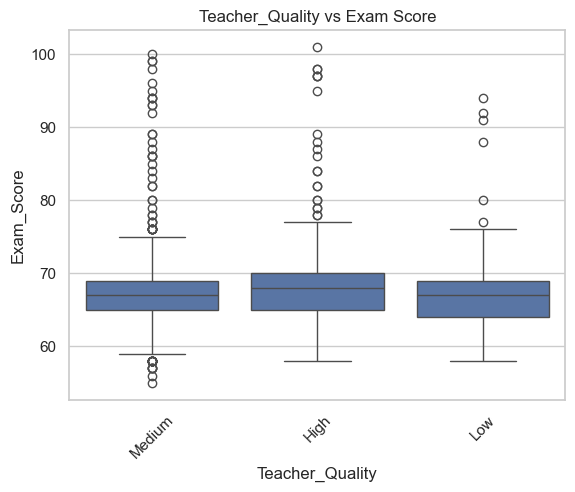

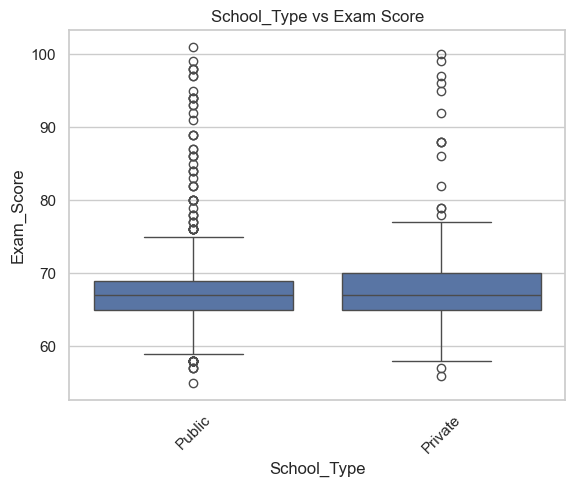

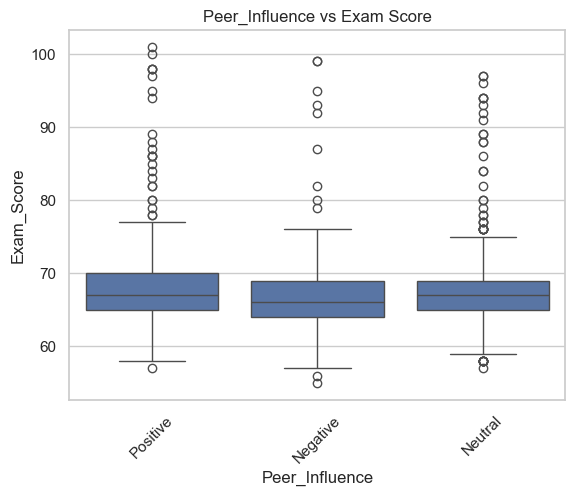

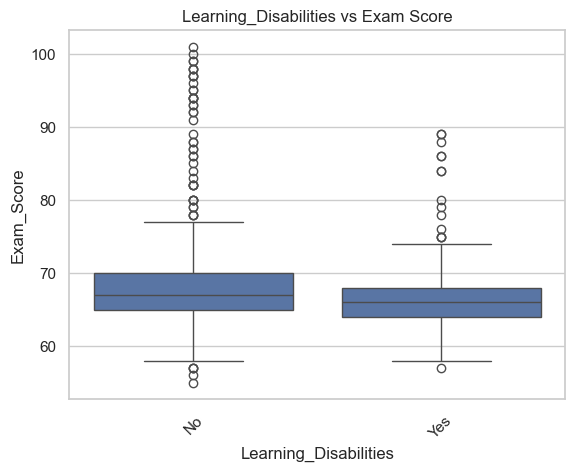

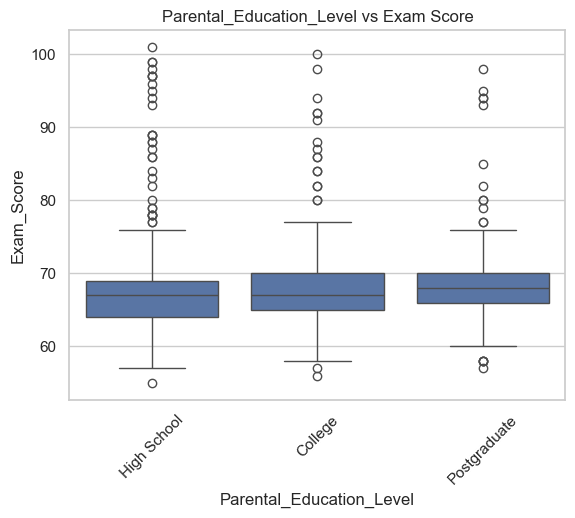

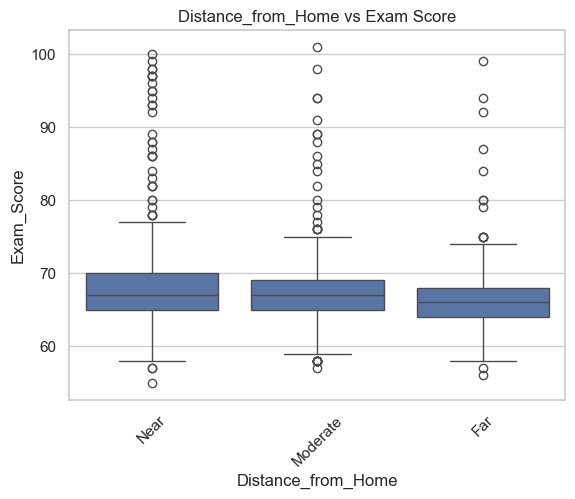

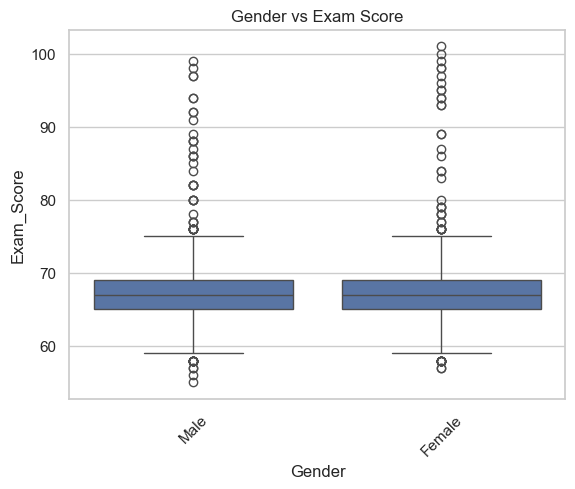

In [1778]:
for col in categorical_cols:
    sns.boxplot(data=df,x=col,y='Exam_Score')
    plt.title(f"{col} vs Exam Score")
    plt.xticks(rotation=45)
    plt.show()

In [1779]:
df = df[df['Exam_Score'] <= 100]

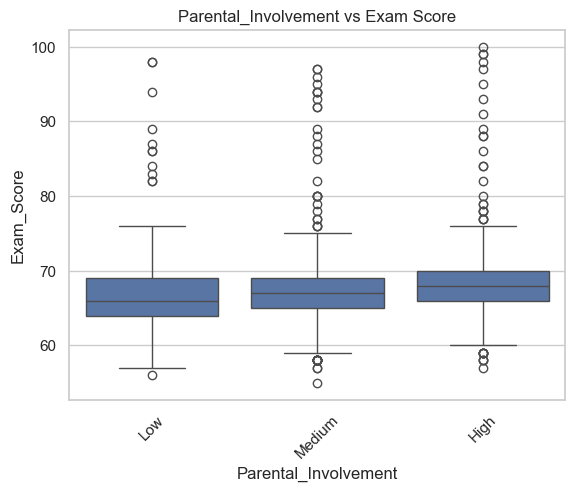

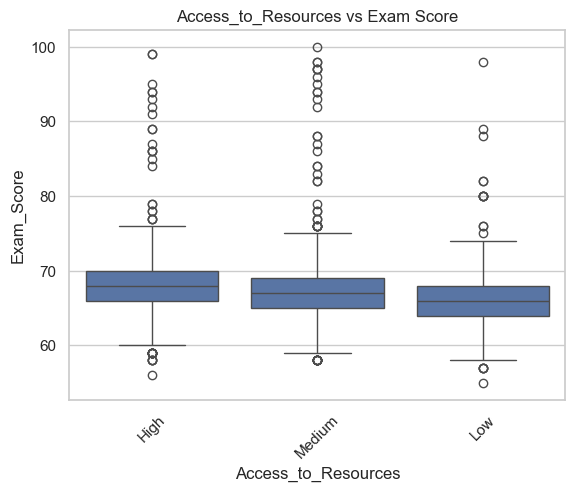

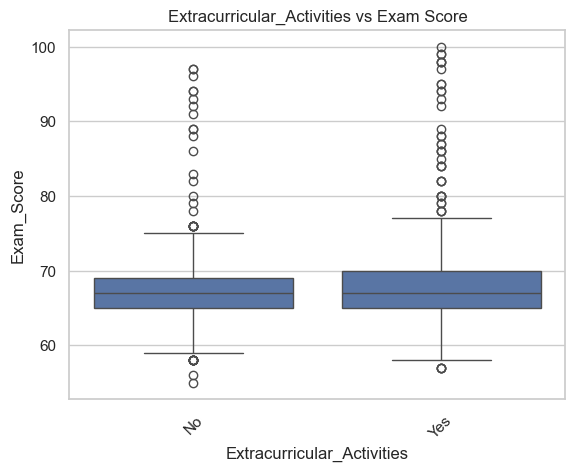

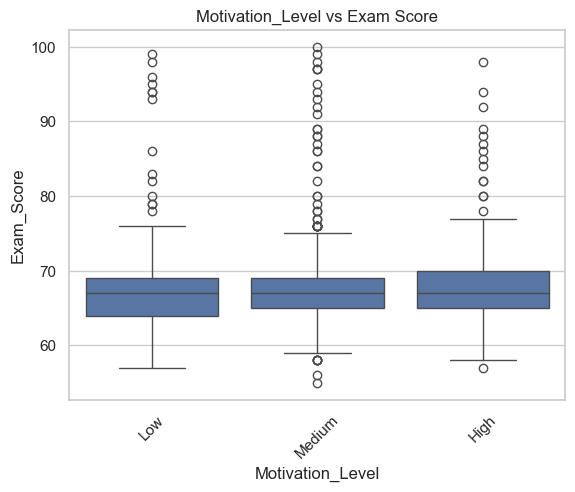

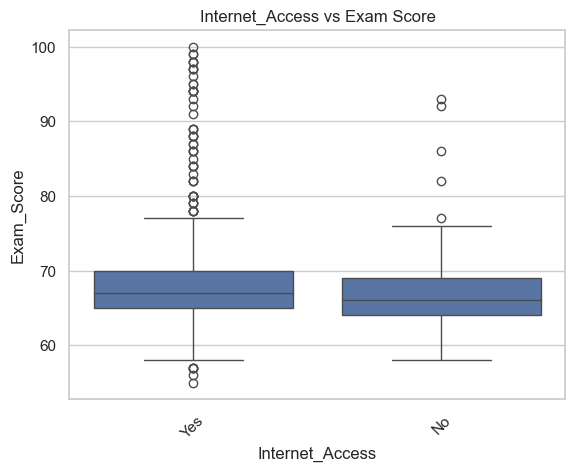

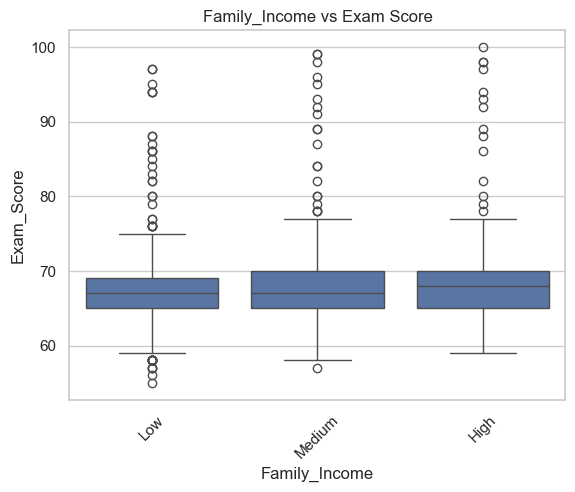

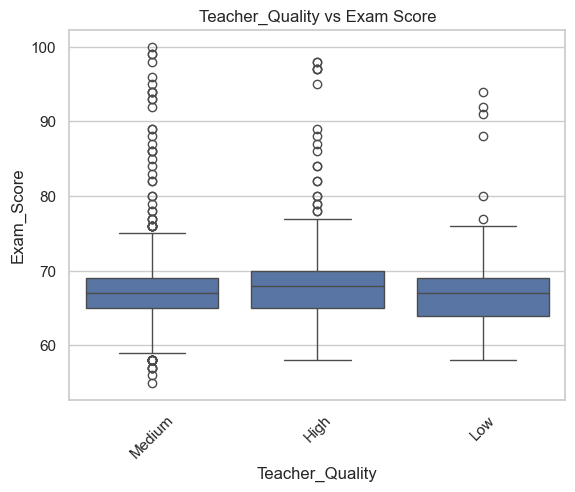

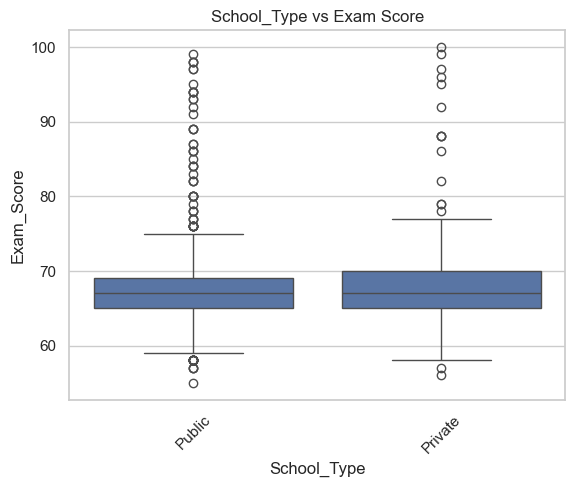

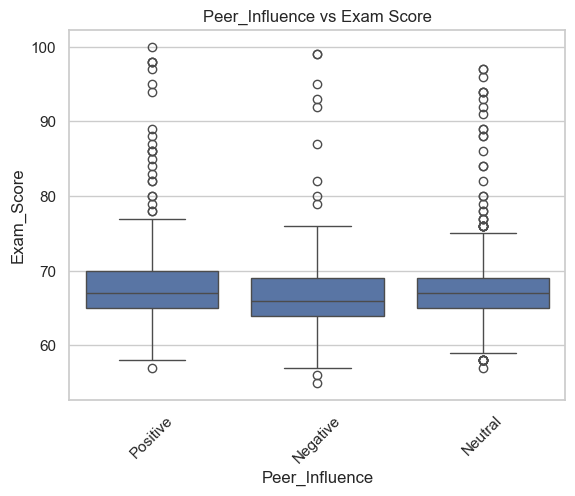

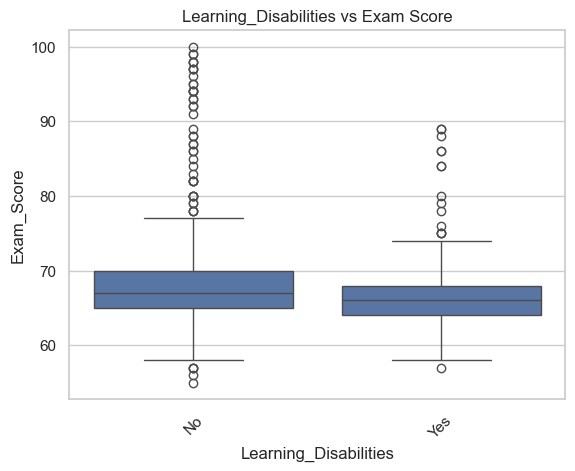

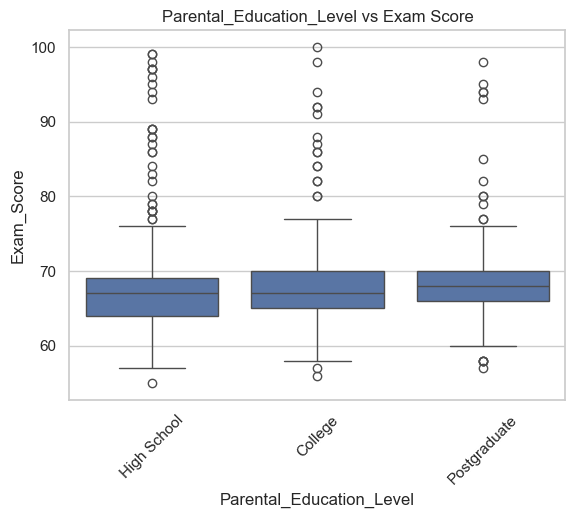

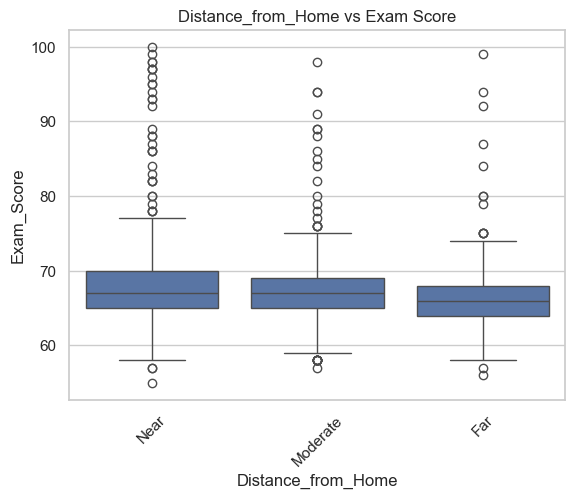

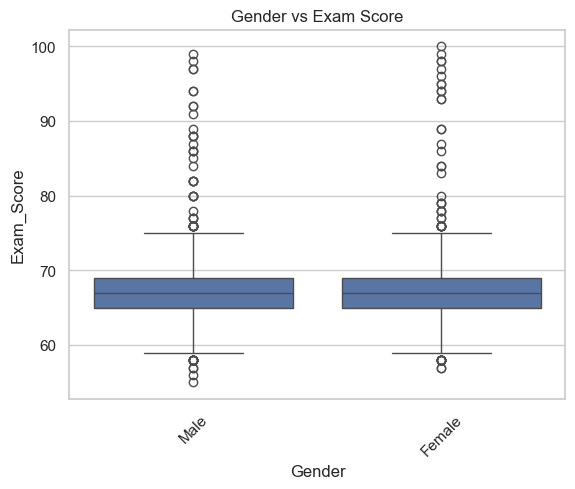

In [1780]:
for col in categorical_cols:
    sns.boxplot(data=df,x=col,y='Exam_Score')
    plt.title(f"{col} vs Exam Score")
    plt.xticks(rotation=45)
    plt.show()

In [1781]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [1782]:
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [1783]:
le=LabelEncoder()
hot=OneHotEncoder(sparse_output=False)
values_Motivation_Level=[['Low','Medium','High']]
ord=OrdinalEncoder(categories=values_Motivation_Level)
df['Motivation_Level']=ord.fit_transform(df[['Motivation_Level']])
values_Internet_Access=[['No','Yes']]
ord=OrdinalEncoder(categories=values_Internet_Access)
df['Internet_Access']=ord.fit_transform(df[['Internet_Access']])
values_Learning_Disabilities=[['No','Yes']]
ord=OrdinalEncoder(categories=values_Learning_Disabilities)
df['Learning_Disabilities']=ord.fit_transform(df[['Learning_Disabilities']])
values_Peer_Influence=[['Negative','Neutral','Positive']]
ord=OrdinalEncoder(categories=values_Peer_Influence)
df['Peer_Influence']=ord.fit_transform(df[['Peer_Influence']])
values_Parental_Involvement=[['Low','Medium','High']]
ord=OrdinalEncoder(categories=values_Parental_Involvement)
df['Parental_Involvement']=ord.fit_transform(df[['Parental_Involvement']])
values_Access_to_Resources=[['Low','Medium','High']]
ord=OrdinalEncoder(categories=values_Access_to_Resources)
df['Access_to_Resources']=ord.fit_transform(df[['Access_to_Resources']])
values_Extracurricular_Activities=[['No','Yes']]
ord=OrdinalEncoder(categories=values_Extracurricular_Activities)
df['Extracurricular_Activities']=ord.fit_transform(df[['Extracurricular_Activities']])
values_Family_Income=[['Low','Medium','High']]
ord=OrdinalEncoder(categories=values_Family_Income)
df['Family_Income']=ord.fit_transform(df[['Family_Income']])
values_Teacher_Quality=[['Low','Medium','High']]
ord=OrdinalEncoder(categories=values_Teacher_Quality)
df['Teacher_Quality']=ord.fit_transform(df[['Teacher_Quality']])
values_School_Type=[['Public','Private']]
ord=OrdinalEncoder(categories=values_School_Type)
df['School_Type']=ord.fit_transform(df[['School_Type']])
values_Parental_Education_Level=[['High School','College','Postgraduate']]
ord=OrdinalEncoder(categories=values_Parental_Education_Level)
df['Parental_Education_Level']=ord.fit_transform(df[['Parental_Education_Level']])
values_Distance_from_Home=[['Far','Moderate','Near']]
ord=OrdinalEncoder(categories=values_Distance_from_Home)
df['Distance_from_Home']=ord.fit_transform(df[['Distance_from_Home']])
df=pd.get_dummies(df,columns=['Gender'])
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,...,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Exam_Score,Gender_Female,Gender_Male
0,23,84,0.0,2.0,0.0,7,73,0.0,1.0,0,...,1.0,0.0,2.0,3,0.0,0.0,2.0,67,False,True
1,19,64,0.0,1.0,0.0,8,59,0.0,1.0,2,...,1.0,0.0,0.0,4,0.0,1.0,1.0,61,True,False
2,24,98,1.0,1.0,1.0,7,91,1.0,1.0,2,...,1.0,0.0,1.0,4,0.0,2.0,2.0,74,False,True
3,29,89,0.0,1.0,1.0,8,98,1.0,1.0,1,...,1.0,0.0,0.0,4,0.0,0.0,1.0,71,False,True
4,19,92,1.0,1.0,1.0,6,65,1.0,1.0,3,...,2.0,0.0,1.0,4,0.0,1.0,2.0,70,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,2.0,1.0,0.0,7,76,1.0,1.0,1,...,1.0,0.0,2.0,2,0.0,0.0,2.0,68,True,False
6603,23,76,2.0,1.0,0.0,8,81,1.0,1.0,3,...,2.0,0.0,2.0,2,0.0,0.0,2.0,69,True,False
6604,20,90,1.0,0.0,1.0,6,65,0.0,1.0,3,...,1.0,0.0,0.0,2,0.0,2.0,2.0,68,True,False
6605,10,86,2.0,2.0,1.0,6,91,2.0,1.0,2,...,1.0,1.0,2.0,3,0.0,0.0,0.0,68,True,False


In [1786]:
df=df.drop(columns=['Gender_Male','Gender_Female'])

In [1788]:
x=df.drop(columns=['Exam_Score'])
y=df['Exam_Score']

In [1789]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [1790]:
models={
    'LinearRegression':{'model':LinearRegression(),
                       'params':{}},
    'DecisionTree':{'model': DecisionTreeRegressor(),
                    'params':{'max_depth':[3,5,10],'min_samples_split':[2,5]}
    },'RandomForest':{'model':RandomForestRegressor(),
                     'params':{'n_estimators':[50,100],'max_depth':[5,10]}}
    
}

In [1791]:
best_models=[]

In [1792]:
for name,config in models.items():
    print(f"Training {name}: \n")
    grid=GridSearchCV(config['model'],config['params'],cv=5,scoring='neg_mean_squared_error')
    grid.fit(x_train_scaled,y_train)
    y_pred=grid.predict(x_test_scaled)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    r2=r2_score(y_test,y_pred)
    best_models.append({'model':name,
                       'best_params':grid.best_params_,
                       'rmse':rmse,
                       'r2':r2})

Training LinearRegression: 

Training DecisionTree: 

Training RandomForest: 



In [1794]:
best_models

[{'model': 'LinearRegression',
  'best_params': {},
  'rmse': 2.0352873925310826,
  'r2': 0.7353711546847117},
 {'model': 'DecisionTree',
  'best_params': {'max_depth': 5, 'min_samples_split': 2},
  'rmse': 2.9344948101904382,
  'r2': 0.44988639141612896},
 {'model': 'RandomForest',
  'best_params': {'max_depth': 10, 'n_estimators': 100},
  'rmse': 2.4570667944832807,
  'r2': 0.6143266567665898}]

In [1795]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)
y_pred_lr=lr_model.predict(x_test)
print(f"R2 Score is {r2_score(y_test,y_pred_lr)}")

R2 Score is 0.7353711546847117


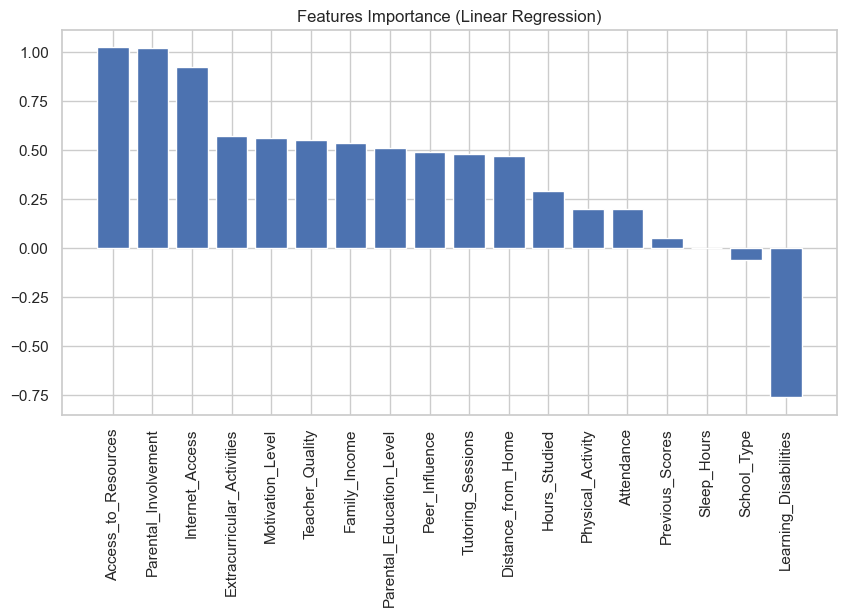

In [1796]:
importances=lr_model.coef_
indices=np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.bar(range(len(importances)),importances[indices])
plt.title('Features Importance (Linear Regression)')
plt.xticks(range(len(importances)),x.columns[indices],rotation=90)
plt.show()

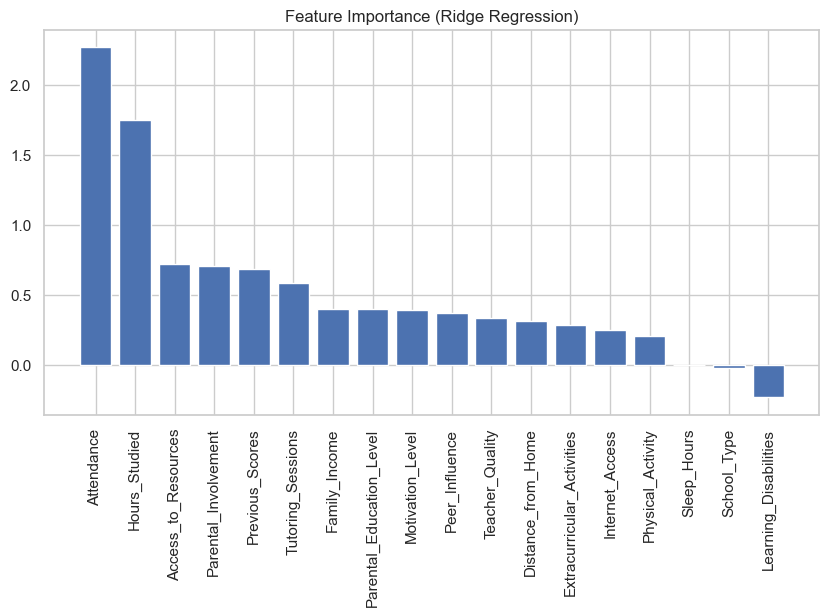

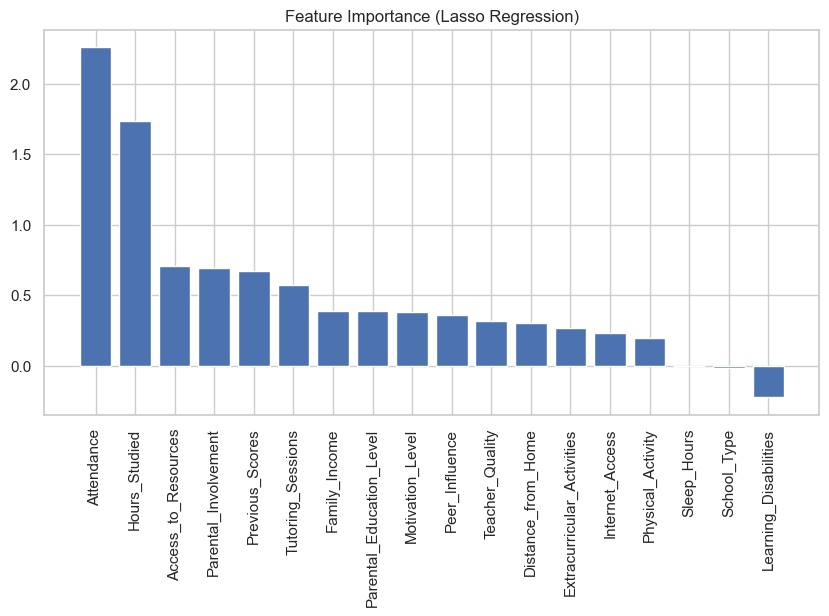

Ridge Train Score: 0.7228028986167352
Ridge Test Score: 0.7353701306855662
Lasso Train Score: 0.7226835923678478
Lasso Test Score: 0.7350010170540544


In [1797]:
ridge=Ridge(alpha=0.1)
ridge.fit(x_train_scaled,y_train)
ridge_coefs = ridge.coef_

lasso = Lasso(alpha=0.01)
lasso.fit(x_train_scaled, y_train)
lasso_coefs = lasso.coef_

indices_ridge = np.argsort(ridge_coefs)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(ridge_coefs)), ridge_coefs[indices_ridge])
plt.xticks(range(len(ridge_coefs)), x.columns[indices_ridge], rotation=90)
plt.title('Feature Importance (Ridge Regression)')
plt.show()

# ----- Plot Lasso -----
indices_lasso = np.argsort(lasso_coefs)[::-1]
plt.figure(figsize=(10, 5))
plt.bar(range(len(lasso_coefs)), lasso_coefs[indices_lasso])
plt.xticks(range(len(lasso_coefs)), x.columns[indices_lasso], rotation=90)
plt.title('Feature Importance (Lasso Regression)')
plt.show()

# Optional: Check performance
print("Ridge Train Score:", ridge.score(x_train_scaled, y_train))
print("Ridge Test Score:", ridge.score(x_test_scaled, y_test))
print("Lasso Train Score:", lasso.score(x_train_scaled, y_train))
print("Lasso Test Score:", lasso.score(x_test_scaled, y_test))

In [1798]:
poly=PolynomialFeatures(degree=2,include_bias=False)
x_poly_train=poly.fit_transform(x_train_scaled)
x_poly_test=poly.transform(x_test_scaled)
poly_model=LinearRegression()
poly_model.fit(x_poly_train,y_train)
y_pred_poly=poly_model.predict(x_poly_test)
print(f"R-Score is {r2_score(y_test,y_pred_poly)}")

R-Score is 0.7257702969771718


In [1799]:
df.corr()['Exam_Score'].sort_values()


Learning_Disabilities        -0.083941
Sleep_Hours                  -0.016314
School_Type                   0.011833
Physical_Activity             0.025260
Internet_Access               0.056219
Extracurricular_Activities    0.062319
Teacher_Quality               0.073742
Distance_from_Home            0.089611
Motivation_Level              0.090809
Family_Income                 0.092913
Peer_Influence                0.098271
Parental_Education_Level      0.107108
Tutoring_Sessions             0.153986
Parental_Involvement          0.159087
Access_to_Resources           0.169035
Previous_Scores               0.173635
Hours_Studied                 0.446174
Attendance                    0.581664
Exam_Score                    1.000000
Name: Exam_Score, dtype: float64

In [1800]:
model = LassoCV(cv=5)
model.fit(x_train, y_train)
print(list(zip(x.columns, model.coef_)))

[('Hours_Studied', 0.2914810583133448), ('Attendance', 0.19591017822947263), ('Parental_Involvement', 0.9618536887146135), ('Access_to_Resources', 0.9583909458581427), ('Extracurricular_Activities', 0.45696412253439467), ('Sleep_Hours', -0.0), ('Previous_Scores', 0.04729371741982183), ('Motivation_Level', 0.5109264446424452), ('Internet_Access', 0.540437598962711), ('Tutoring_Sessions', 0.4587169239973735), ('Family_Income', 0.4897264448724422), ('Teacher_Quality', 0.47396488412024224), ('School_Type', -0.0), ('Peer_Influence', 0.4464588432519287), ('Physical_Activity', 0.1682683732852991), ('Learning_Disabilities', -0.47837278342101), ('Parental_Education_Level', 0.46497498791426584), ('Distance_from_Home', 0.4102639180451807)]


In [1801]:
results_df=pd.DataFrame(best_models)
results_df.sort_values(by='rmse')

,model,best_params,rmse,r2
0,LinearRegression,{},2.035287,0.735371
2,RandomForest,"{'max_depth': 10, 'n_estimators': 100}",2.457067,0.614327
1,DecisionTree,"{'max_depth': 5, 'min_samples_split': 2}",2.934495,0.449886


In [1803]:
best_row=results_df.sort_values(by='rmse').iloc[0]

In [1806]:
best_row

model          LinearRegression
best_params                  {}
rmse                   2.035287
r2                     0.735371
Name: 0, dtype: object

In [1807]:
best_model_name=best_row['model']

In [1808]:
best_model_name

'LinearRegression'

In [1809]:
best_model_config=models[best_model_name]

In [1811]:
best_model_config

{'model': LinearRegression(), 'params': {}}

In [1847]:
scaler.fit(x)

StandardScaler()

In [1849]:
lr_model.fit(x,y)
joblib.dump(lr_model,'model.pkl')
joblib.dump(scaler,'scaler.pkl')
feature_names = df.columns.tolist()
joblib.dump(feature_names, "features.pkl")

['features.pkl']

In [1828]:
feature_names

['Hours_Studied',
 'Attendance',
 'Parental_Involvement',
 'Access_to_Resources',
 'Extracurricular_Activities',
 'Sleep_Hours',
 'Previous_Scores',
 'Motivation_Level',
 'Internet_Access',
 'Tutoring_Sessions',
 'Family_Income',
 'Teacher_Quality',
 'School_Type',
 'Peer_Influence',
 'Physical_Activity',
 'Learning_Disabilities',
 'Parental_Education_Level',
 'Distance_from_Home',
 'Exam_Score']